# Happy Life Cookbook

Welcome to the "Happy Life Cookbook," a data-driven exploration into the ingredients of happiness. At the heart of this project lies a fundamental question: What makes us happy? Happiness, a complex and multifaceted emotion, is influenced by a myriad of factors. 

First, there will be a whole picture of what brings us happiness.

Second, we'll dissect the elements of happiness from both short-term and long-term perspectives. What are the quick fixes that bring us joy, and how do they differ from the pursuits that contribute to our lasting contentment? This analysis aims to uncover the practices and experiences that not only spark happiness but also sustain it over time.

Third, this study will delve into gender preferences in the pursuit of happiness. Do men and women find joy in different activities or experiences? This exploration will provide insights into how gender influences our paths to happiness.

Additionally, it was originally intended to explore how happyness transcends or varies across age groups. However, most of the age groups in the data are concentrated in the 25-37 age group, which does not cover all age groups, so it is impossible to provide analysis from this perspective. So this cookbook is only suitable for people of this age group.

By synthesizing data from various demographics and psychological studies, the "Happy Life Cookbook" aims to provide a recipe for content and fulfilled life. Let's unravel the complexities of happiness and discover what truly makes life worth living.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
# nltk.download('all')
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liangkexin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangkexin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liangkexin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# <font color='blue'>Import dataset and EDA</font>

In [2]:
df = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/cleaned_hm.csv")
print('df shape', df.shape)

df_demographic = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/demographic.csv")
print('df_demographic shape', df_demographic.shape)

df_senselabel = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/senselabel.csv")
print('df_senselabel shape', df_senselabel.shape)

df_vad = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/vad.csv")
print('df_vad shape', df_vad.shape)

df shape (100535, 9)
df_demographic shape (10844, 6)
df_senselabel shape (2017463, 8)
df_vad shape (100535, 4)


### - Explore Clean_hm Dataset

In [3]:
columns = df.columns
#columns
print(df.dtypes)

hmid                      int64
wid                       int64
reflection_period        object
original_hm              object
cleaned_hm               object
modified                   bool
num_sentence              int64
ground_truth_category    object
predicted_category       object
dtype: object


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
missing_percentage = total / len(df) * 100
missing_percentage

ground_truth_category    85.950167
hmid                      0.000000
wid                       0.000000
reflection_period         0.000000
original_hm               0.000000
cleaned_hm                0.000000
modified                  0.000000
num_sentence              0.000000
predicted_category        0.000000
dtype: float64

**<font color='lilac'>'ground_truth_category' has very high missing rate while other colunms is less than 5% of missing rate, dropping 'ground_truth_category' is chosen to work with missing data here.</font>**

In [5]:
no_use = 'ground_truth_category'
df = df.drop(columns = no_use)
df.isnull().sum()

hmid                  0
wid                   0
reflection_period     0
original_hm           0
cleaned_hm            0
modified              0
num_sentence          0
predicted_category    0
dtype: int64

In [6]:
df

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,affection
...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,bonding


In [7]:
df.describe().style.background_gradient(cmap="ocean_r")

,hmid,wid,num_sentence
count,100535.000000,100535.000000,100535.000000
mean,78213.756722,2746.619028,1.340767
std,29178.959001,3535.010347,1.297159
min,27673.000000,1.000000,1.000000
25%,52941.500000,410.000000,1.000000
50%,78204.000000,1125.000000,1.000000
75%,103490.500000,3507.000000,1.000000
max,128766.000000,13839.000000,69.000000


In [8]:
df['reflection_period'].unique()
df['reflection_period'].value_counts()

3m     50704
24h    49831
Name: reflection_period, dtype: int64

In [9]:
df['predicted_category'].unique()
df['predicted_category'].value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

### -  Explore Demographic Dataset

In [10]:
df_demographic

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


In [11]:
print(df_demographic.dtypes)

wid            int64
age           object
country       object
gender        object
marital       object
parenthood    object
dtype: object


**The data type of 'age' is object, it needs to be int or float for following analysis.**

In [12]:
df_demographic['age'] = pd.to_numeric(df_demographic['age'], errors='coerce')
print(df_demographic.dtypes)

wid             int64
age           float64
country        object
gender         object
marital        object
parenthood     object
dtype: object


In [13]:
df_demographic.describe()

,wid,age
count,10844.000000,10806.000000
mean,6411.012726,32.813530
std,4075.946830,10.859181
min,1.000000,2.000000
25%,2747.750000,25.000000
50%,6107.500000,30.000000
75%,9982.250000,37.000000
max,13839.000000,233.000000


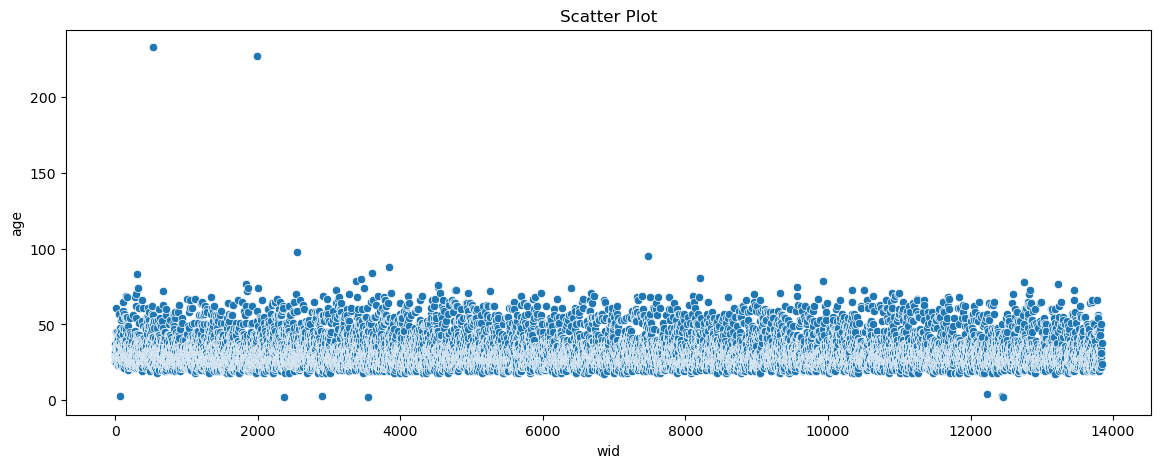

In [14]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x='wid', y='age', data=df_demographic)
plt.title('Scatter Plot')
plt.show()

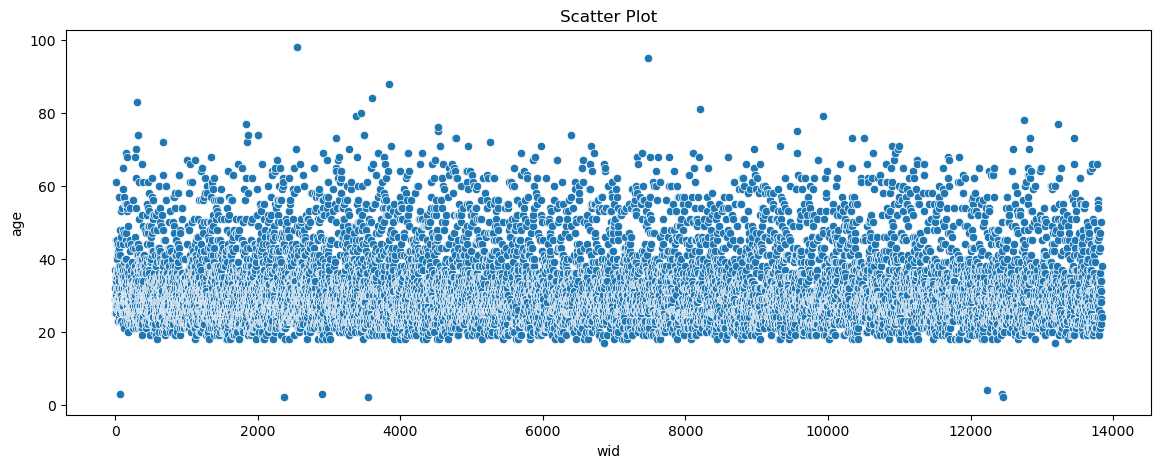

In [15]:
df_demographic = df_demographic[(df_demographic['age']<100) & (df_demographic['age']>0)] 
plt.figure(figsize=(14, 5))
sns.scatterplot(x='wid', y='age', data=df_demographic)
plt.title('Scatter Plot')
plt.show()

In [16]:
df_demographic.describe()

,wid,age
count,10804.000000,10804.000000
mean,6404.302018,32.777027
std,4076.742538,10.523411
min,1.000000,2.000000
25%,2739.750000,25.000000
50%,6097.500000,30.000000
75%,9969.500000,37.000000
max,13839.000000,98.000000


In [17]:
df_demographic['country'].value_counts()

USA    9250
IND     961
CAN      66
VEN      54
GBR      47
       ... 
SVN       1
SAU       1
ECU       1
ZMB       1
UKR       1
Name: country, Length: 100, dtype: int64

In [18]:
df_demographic['gender'].value_counts()

f    5432
m    5300
o      55
Name: gender, dtype: int64

### - Explore Senselabel dataset

In [19]:
df_senselabel

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition
2,31526,3,a,a,DET,O,0,NaN
3,31526,4,silver,silver,ADJ,O,0,NaN
4,31526,5,coin,coin,NOUN,O,0,n.artifact
...,...,...,...,...,...,...,...,...
2017458,128766,4,great,great,ADJ,O,0,NaN
2017459,128766,5,workout,workout,NOUN,O,0,n.event
2017460,128766,6,last,last,ADJ,O,0,NaN
2017461,128766,7,night,night,NOUN,O,0,n.time


In [20]:
df_senselabel.describe()

,hmid,tokenOffset,offsetParent
count,2.017463e+06,2.017463e+06,2.017463e+06
mean,7.774349e+04,2.477874e+01,1.227687e+00
std,2.892613e+04,5.982328e+01,1.413839e+01
min,2.767300e+04,1.000000e+00,0.000000e+00
25%,5.370500e+04,6.000000e+00,0.000000e+00
50%,7.693200e+04,1.100000e+01,0.000000e+00
75%,1.025440e+05,2.300000e+01,0.000000e+00
max,1.287660e+05,1.349000e+03,1.336000e+03


In [21]:
total = df_senselabel.isnull().sum().sort_values(ascending=False)
missing_percentage = total / len(df) * 100
missing_percentage

supersenseLabel    1314.294524
word                  0.063659
lowercaseLemma        0.061670
hmid                  0.000000
tokenOffset           0.000000
POS                   0.000000
MWE                   0.000000
offsetParent          0.000000
dtype: float64

In [22]:
df_senselabel['MWE'].value_counts()

O    1816919
I     113031
B      74823
o      12588
b         51
i         51
Name: MWE, dtype: int64

In [23]:
df_senselabel['offsetParent'].value_counts()

0      1904381
2         8235
4         7102
5         7080
3         6774
        ...   
780          1
761          1
726          1
722          1
951          1
Name: offsetParent, Length: 743, dtype: int64

### - Topic label classification

In [24]:
# load all topic files
dict_entertainment = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/entertainment-dict.csv", header = None)
dict_exercise = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/exercise-dict.csv", header = None)
dict_family = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/family-dict.csv", header = None)
dict_food = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/food-dict.csv", header = None)
dict_people = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/people-dict.csv", header = None)
dict_pets = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/pets-dict.csv", header = None)
dict_school = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/school-dict.csv", header = None)
dict_shopping = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/shopping-dict.csv", header = None)
dict_work = pd.read_csv("/Users/liangkexin/Desktop/Columbia U/5243 Applied Data Science/project 1/data/HappyDB Dataset/topic/work-dict.csv", header = None)

# create a topic dictionary
topic_dictionary = dict()
topic_dictionary["entertainment"] = dict_entertainment[0].tolist()
topic_dictionary["exercise"] = dict_exercise[0].tolist()
topic_dictionary["family"] = dict_family[0].tolist()
topic_dictionary["food"] = dict_food[0].tolist()
topic_dictionary["people"] = dict_people[0].tolist()
topic_dictionary["pets"] = dict_pets[0].tolist()
topic_dictionary["school"] = dict_school[0].tolist()
topic_dictionary["shopping"] = dict_shopping[0].tolist()
topic_dictionary["work"] = dict_work[0].tolist()

topic_dictionary

{'entertainment': ['movie',
  'tv',
  'film',
  'television',
  'show',
  'book',
  'videogame',
  'films',
  'movies',
  'shows',
  'books',
  'videogames',
  'novel',
  'broadcast',
  'video-game',
  'author',
  'broadcasts',
  'broadcasting',
  'novels',
  'broadcasted',
  'aired',
  'airing',
  'short stories',
  'fiction',
  'non-fiction',
  'airs',
  'radio',
  'episodes',
  'flick',
  'nonfiction',
  'episode',
  'flicks',
  'science fiction',
  'poems',
  'poem',
  'poetry',
  't.v.',
  'youtube',
  'video',
  'netflix',
  'premiere',
  'album',
  'reading',
  'albums',
  't.v',
  'videos',
  'read',
  'premiered',
  'hulu',
  'premieres',
  'premiering',
  'novellas',
  'vids',
  'poet',
  'music video',
  'vid',
  'novella',
  'poets',
  'songs',
  'writer',
  'song',
  'music',
  'tunes',
  'novelist',
  'tune',
  'lyrics',
  'theater',
  'theatre',
  'writers',
  'debuted',
  'lyric',
  'novelists',
  'debuting',
  'debuts',
  'concert',
  'video game',
  'anime',
  'new si

In [25]:
tokens = df_senselabel['lowercaseLemma']
label_dict = topic_dictionary

token_labels = {}

for token in tokens:
    assigned = False
    for label, keywords in label_dict.items():
        if token in keywords:
            token_labels[token] = label
            assigned = True
            break  # Stop checking once the first match is found
    if not assigned:
        token_labels[token] = None 

print(token_labels)

{'i': None, 'find': None, 'a': None, 'silver': None, 'coin': None, 'from': None, '1852': None, 'bury': None, 'in': None, 'the': None, 'sand': None, 'of': None, 'capao': None, 'da': None, 'canoa': None, 'beach': None, ',': None, 'locate': None, 'southern': None, 'brazil': None, '.': None, 'this': None, 'one': None, 'be': None, 'pretty': None, 'minuscule': None, 'we': None, 'have': None, 'to': None, 'go': None, 'laundromat': None, 'today': None, 'and': None, 'obviously': None, 'all': None, 'three': None, 'my': None, 'kid': 'family', 'with': None, 'me': None, '5': None, 'year': None, 'old': None, '2': None, 'month': None, 'last': None, 'time': None, 'they': None, 'butt': None, 'want': None, 'scream': None, 'whole': None, 'two': None, 'girl': 'people', 'over': None, 'place': None, 'basically': None, 'perfect': None, 'stay': None, 'content': None, 'his': None, 'car': None, 'seat': None, 'toy': None, 'try': None, 'make': None, 'it': None, 'more': None, 'fun': None, 'for': None, 'so': None, '

**<font color='lilac'>By observing df_senselabel, we found that among the steps that originally need to be applied to nlp preprocessing, 1, 2, and 4 have been processed in senselabel:</font>**
1. Lowercasing
2. Tokenization
3. Remove stopwords and punctuations
4. Lemmatization

**<font color='lilac'>However, by checking with ‘nltk.FreqDist’, some high-frequency words are found that they are not the target words, so based on senselabel, supplementary actions include filtering out punctuation marks, numbers and adjectives, and adding some new stopwords.</font>**

In [26]:
senselabel = df_senselabel[(df_senselabel['POS']!='PUNCT') & (df_senselabel['POS']!='NUM') & (df_senselabel['POS']!='ADJ')]

In [27]:
stop_words = set(stopwords.words('english'))
new_stopwords = ['day', 'today', 'yesterday', 'like', 'get', 'got', 'goes', 'went',
                 'one', 'two', 'make', 'made', 'see', 'saw', 'find', 'found', 'think',
                 'thought', 'year', 'last', 'month', 'months', 'first', 'time', 'morning',
                 'night', 'happy','happier', 'happiest', 'take', 'year', 'week', 'first time',
                 'days','last', 'week', 'past','able', 'really', 'come', 'afternoon', 
                 'hour', 'going', 'friends', 'ago', 'lot','go',"'s","n't",'new','watch'
                 ]
stop_words = stop_words.union(new_stopwords)
filtered_tokens = [word for word in senselabel['lowercaseLemma'] if word not in stop_words]

my_str_list = [str(item) for item in filtered_tokens] 

freq_dict = nltk.FreqDist(filtered_tokens)
print(freq_dict.most_common(10))

[('friend', 10462), ('work', 9856), ('family', 4687), ('home', 4213), ('buy', 3685), ('son', 3627), ('play', 3549), ('dinner', 3399), ('daughter', 3398), ('moment', 3368)]


In [28]:
senselabel_topic = senselabel
senselabel_topic['tokenLabel'] = senselabel_topic['lowercaseLemma'].map(token_labels)
senselabel_topic.iloc[30:40]

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel,tokenLabel
38,37050,17,I,i,PRON,O,0,NaN,None
39,37050,18,had,have,VERB,O,0,v.stative,None
40,37050,19,all,all,DET,O,0,NaN,None
42,37050,21,of,of,ADP,O,0,NaN,None
43,37050,22,my,my,PRON,O,0,NaN,None
44,37050,23,kids,kid,NOUN,O,0,n.person,family
45,37050,24,with,with,ADP,O,0,NaN,None
46,37050,25,me,me,PRON,O,0,NaN,None
48,37050,27,my,my,PRON,O,0,NaN,None
50,37050,29,year,year,NOUN,B,0,n.person,None


In [29]:
senselabel_topic.shape

(1680905, 9)

### - Merge hm & demographic

In [30]:
df = pd.merge(df, df_demographic)
print('df_merge shape', df.shape)

df_merge shape (100334, 13)


# <font color='blue'>Section 1: A whole picture of what brings us happiness</font>

**In this project, there are 7 categories related to happy moments. They are "affection", "achievement", "enjoy_the_moment", "bonding", "leisure", "nature", "exercise". Let's see how these categories contribute to our happy moments.**

In [31]:
category_counts = df["predicted_category"].value_counts()
category_counts/category_counts.sum()*100

affection           33.953595
achievement         33.818048
enjoy_the_moment    11.086970
bonding             10.681324
leisure              7.428190
nature               1.834872
exercise             1.197002
Name: predicted_category, dtype: float64

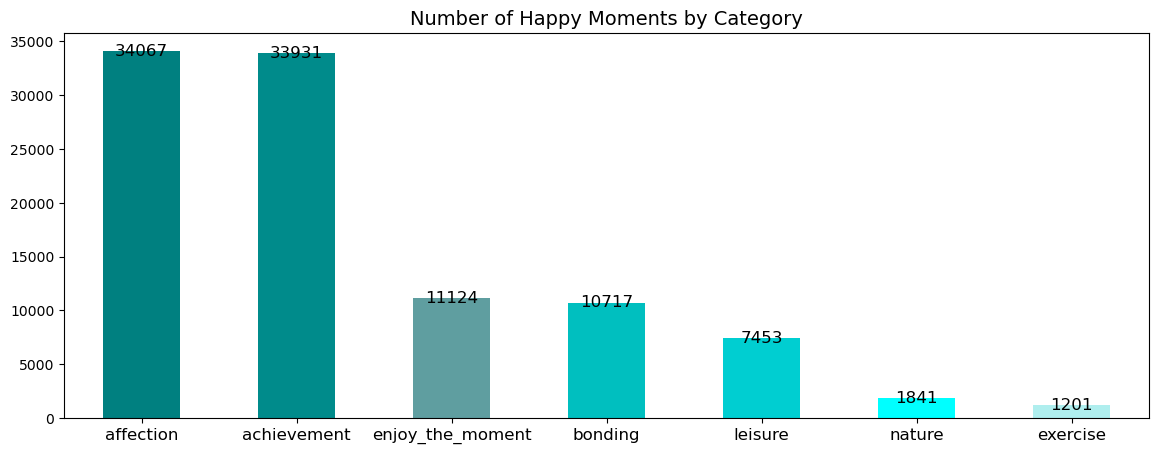

In [32]:
plt.figure(figsize=(14, 5))
category_counts = category_counts.plot(kind='bar',color=['teal','darkcyan','cadetblue','c','darkturquoise','cyan','paleturquoise'])
for p in category_counts.patches:
    category_counts.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()+10),
                ha='center', va='center', fontsize=12, color='black')
plt.title('Number of Happy Moments by Category', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

**"Affection" and "Achievement" have the highest number of reported happy moments. Affection, with 34,067 instances, is the most common source of happiness, followed closely by Achievement with 33,931 instances. This suggests that interpersonal relationships and personal successes are significant contributors to people's happiness, taking place over 65%.**

**"Enjoy the Moment" and "Bonding" show a moderate number of happy moments,equally sharing 10% over all. These categories indicate that people find happiness in living in the present and making connections with others.**

## - What brings us happy?

In this problem, word cloud will be used to visually observe what people's happy moments contain.

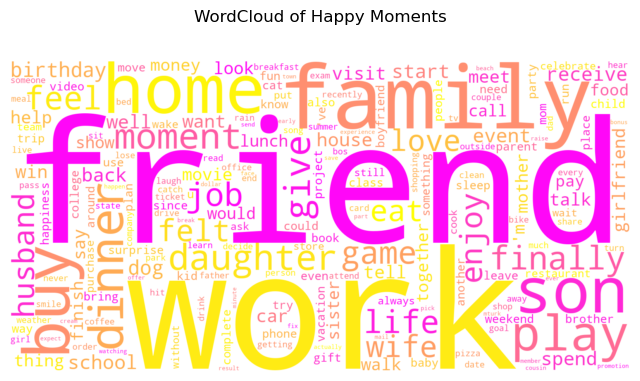

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Function to create random colors
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(50.0 * random.random())
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generating word cloud

wordcloud = WordCloud(width=1600, height=800, background_color='white',colormap='spring_r').generate_from_frequencies(freq_dict)

# Displaying the WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Happy Moments', fontsize = 12, y = 1.1)
plt.show()

**<font>Now the word cloud diagram has given some interesting information. Friends and work are the two things that bring the most happiness. It has also noticed that besides 'friend', 'work' and families, 'buy', 'play' and 'dinner' are things that can make us happy. After all, who doesn’t like shopping, entertainment and food?</font>**

### - <font> How the frequencies of predicted categories distribute over all happy moments? Let's then take a look at the proportion of topics in each category.</font>

In [34]:
df_topic = pd.merge(df, senselabel_topic)
df_topicT = df_topic[df_topic['tokenLabel'].notna()]
df_topicT.head(5)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,predicted_category,age,country,...,marital,parenthood,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel,tokenLabel
6,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,affection,35.0,USA,...,single,n,8,someone,someone,NOUN,O,0,NaN,people
31,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,leisure,35.0,USA,...,single,n,5,music,music,NOUN,O,0,n.communication,entertainment
35,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,leisure,35.0,USA,...,single,n,10,album,album,NOUN,O,0,n.communication,entertainment
47,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,bonding,35.0,USA,...,single,n,5,movie,movie,NOUN,O,0,n.communication,entertainment
50,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,bonding,35.0,USA,...,single,n,8,friend,friend,NOUN,O,0,n.person,people


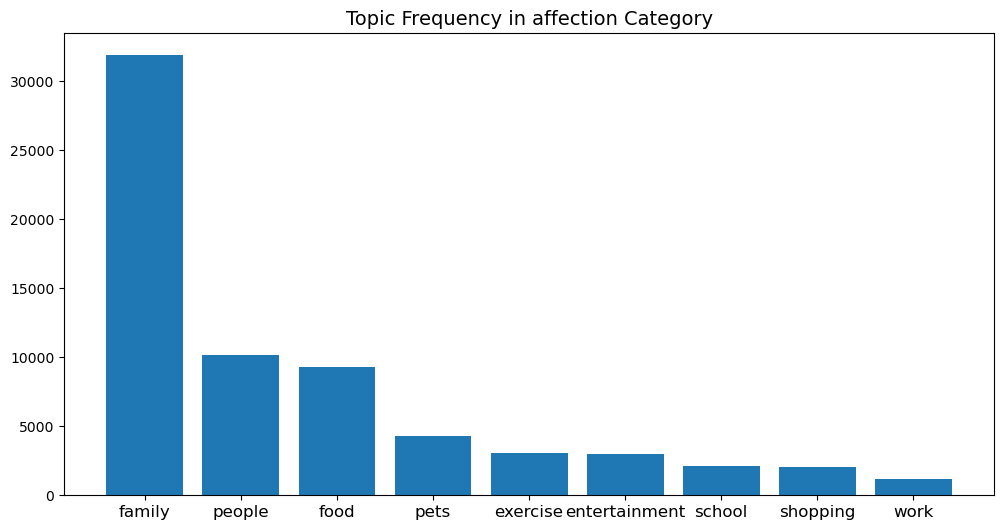

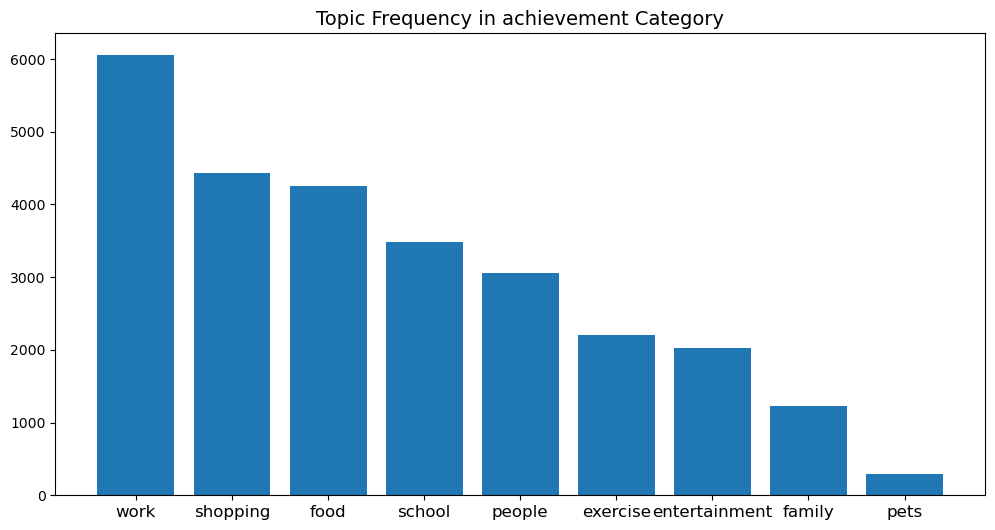

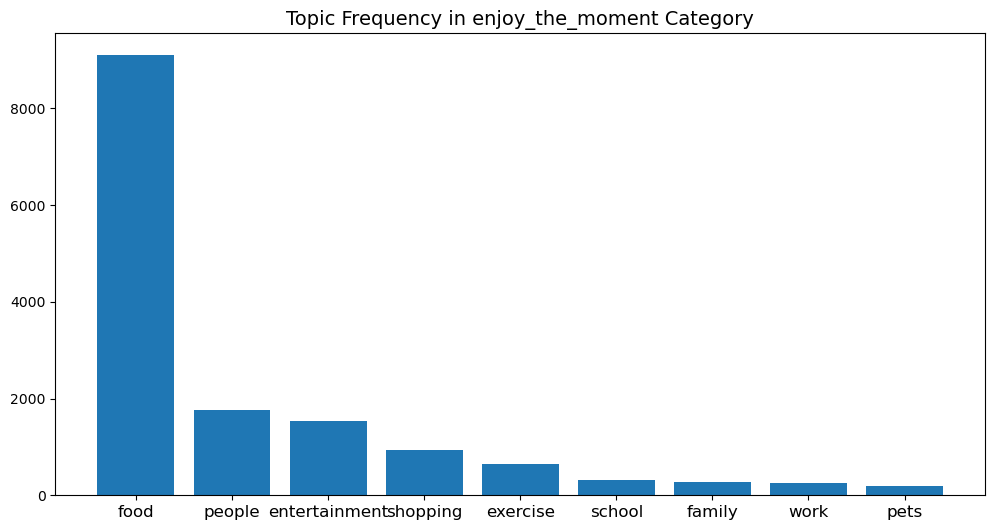

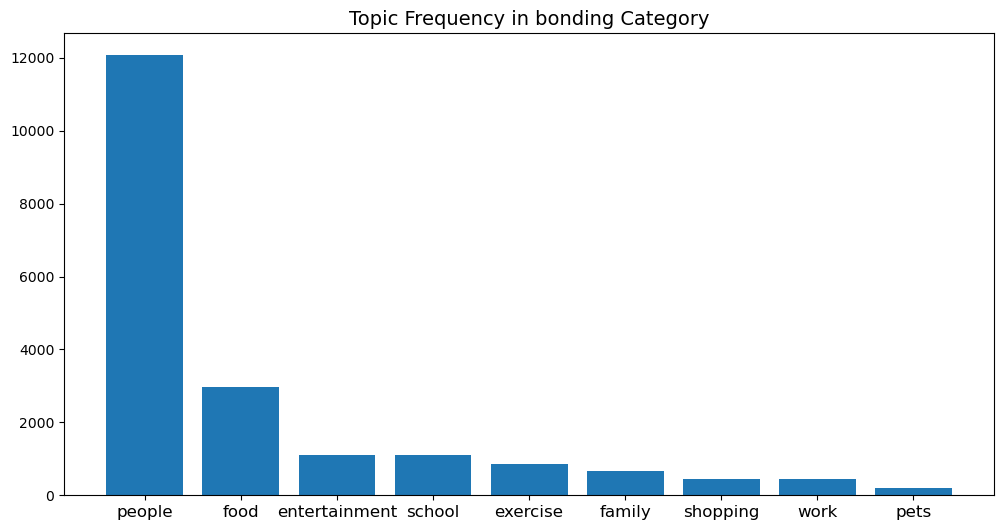

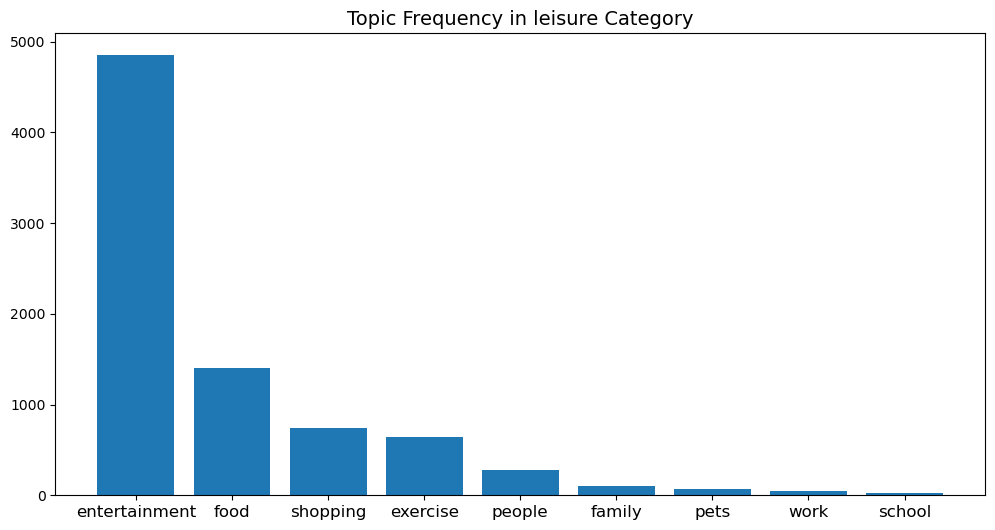

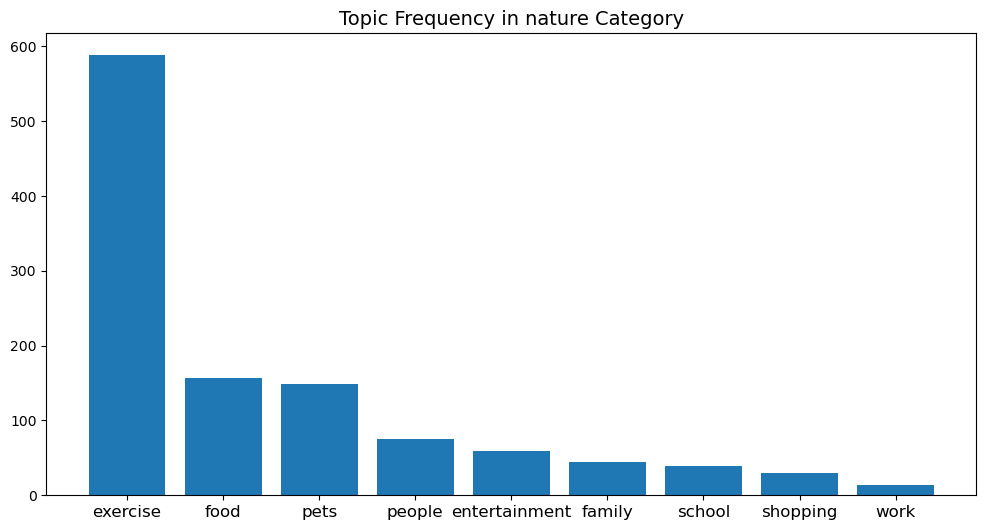

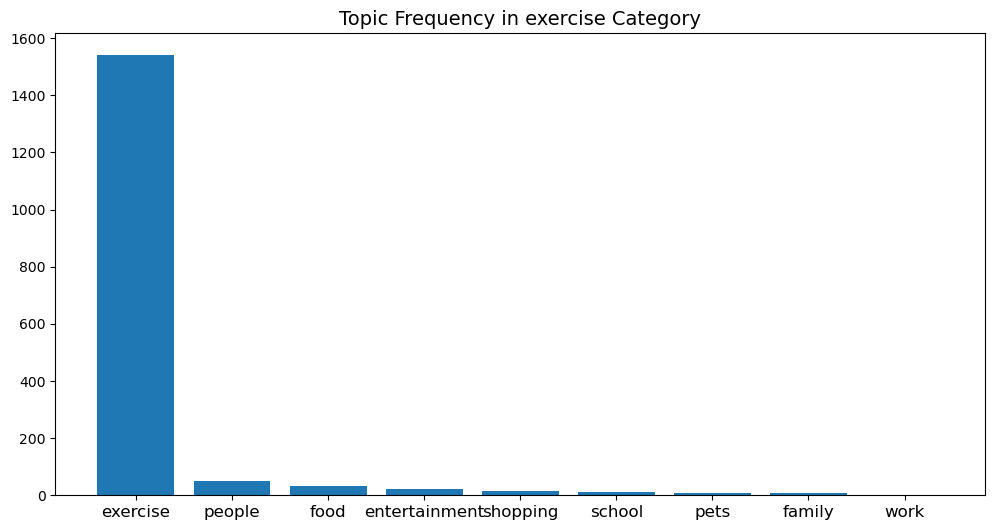

In [35]:
topic_list = ["entertainment","exercise","family","food","people","school","work","shopping","pets"]
happiness_category = ["affection", "achievement", "enjoy_the_moment", "bonding", "leisure", "nature", "exercise"]
def topic_counts(df_c):
    topic_counts_list = dict()
    for topic in topic_list:
        topic_counts_list[topic] = (df_c['tokenLabel'] == topic).sum()
    topic_counts = dict(sorted(topic_counts_list.items(), key=lambda x: x[1], reverse=True))
    return topic_counts
for category in happiness_category:
    df_c = df_topicT[df_topicT["predicted_category"]==category]
    plt.figure(figsize=(12, 6))
    plt.bar(list(topic_counts(df_c).keys()),list(topic_counts(df_c).values()) )
    plt.title(f'Topic Frequency in {category} Category', fontsize=14)
    plt.xticks(fontsize=12)

**In the category of affection, family is most frequently mentioned. In the category of achievement, work is most frequently mentioned. In the category of enjoying the moment, food is most frequently mentioned. In the category of bonding, people are most frequently mentioned. In the category of leisure, entertainment is most frequently mentioned. In the categories of nature and exercise, exercise is most frequently mentioned.**

# <font color='blue'> Section 2: How predicted categpries distribute refer to long and short reflection period (3m vs 24h)</font> 

In [36]:
df.shape

(100334, 13)

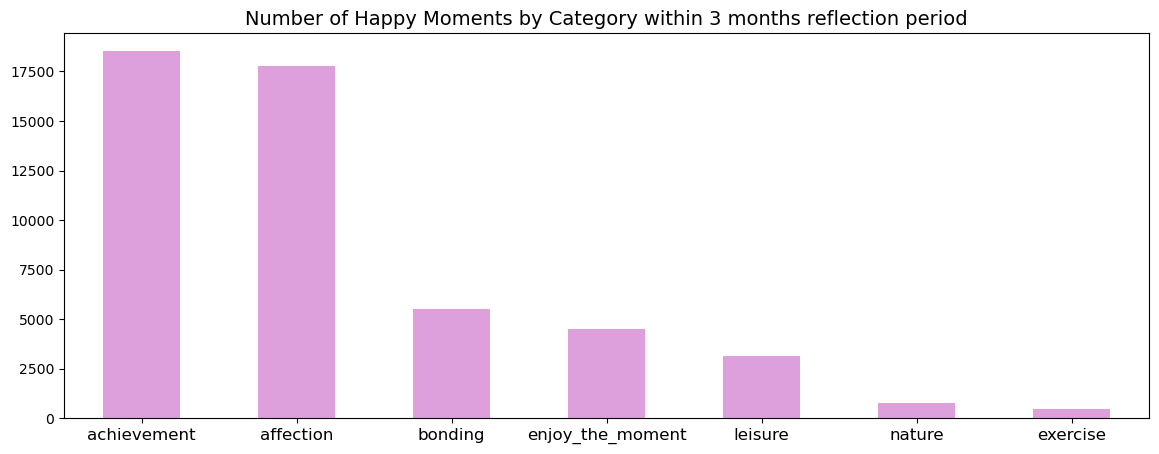

In [37]:
df_3m = df[df['reflection_period']=='3m']
plt.figure(figsize=(14, 5))
category_counts_3m = df_3m["predicted_category"].value_counts()
category_counts_3m.plot(kind='bar',color='plum')
for p in category_counts.patches:
    category_counts.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()+10),
                ha='center', va='center', fontsize=12, color='black')
plt.title('Number of Happy Moments by Category within 3 months reflection period', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

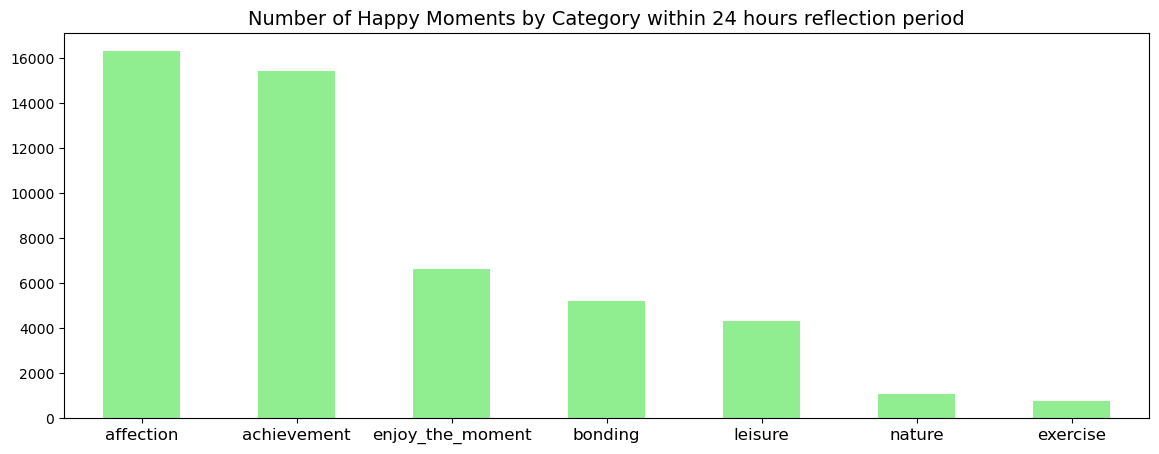

In [38]:
df_24h = df[df['reflection_period']=='24h']
plt.figure(figsize=(14, 5))
category_counts_24h = df_24h["predicted_category"].value_counts()
category_counts_24h.plot(kind='bar',color='lightgreen')
for p in category_counts.patches:
    category_counts.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()+10),
                ha='center', va='center', fontsize=12, color='black')
plt.title('Number of Happy Moments by Category within 24 hours reflection period', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

**It is clear that, whether looking back over the past three months or 24 hours, the categories of 'affection' and 'achievement' are significantly more likely to bring happiness than other categories. The difference lies in the rankings of 'affection' and 'achievement' over long and short periods: when recalling the past three months, 'achievement' stands out as the most memorable and continually brings happiness. However, when recalling the past 24 hours, 'affection' tends to evoke happier emotions more than achievement.**

**To further understand what constitutes the topics of affection and achievement, we will next analyze the components of these two topics. Since the introduction of labels led to the exclusion of some information labeled as 'None', the original number of categories has been altered. Therefore, in this discussion, we will focus only on the composition of individual categories, without comparing the components between different categories.**

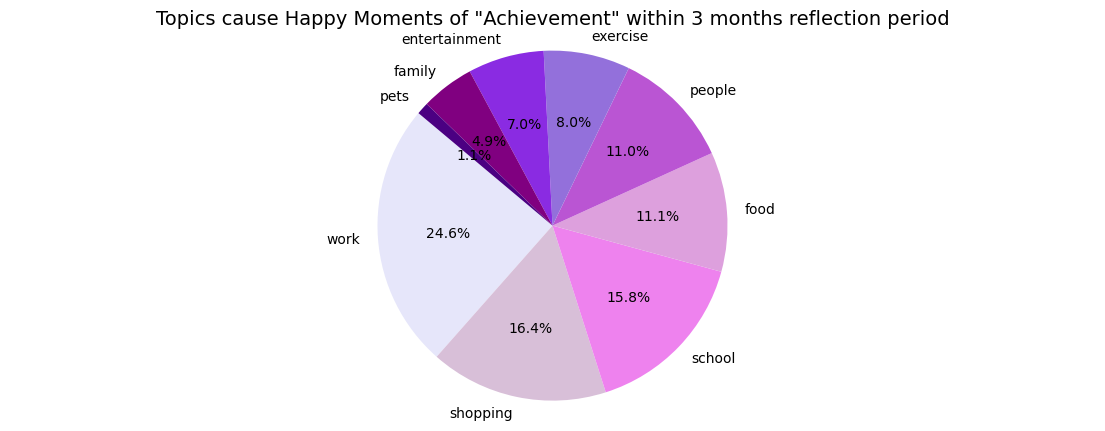

In [39]:
df_3m_t = df_topicT[(df_topicT['reflection_period']=='3m')&(df_topicT['predicted_category']=='achievement')]
plt.figure(figsize=(14, 5))
label_counts_3m = df_3m_t["tokenLabel"].value_counts()
colors = ['lavender','thistle','violet','plum','mediumorchid','mediumpurple','blueviolet','purple','indigo']

plt.pie(label_counts_3m, labels=label_counts_3m.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Topics cause Happy Moments of "Achievement" within 3 months reflection period', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

**In the topic of achievement, the most frequently mentioned aspects are 'work', 'shopping', and 'school', which together account for more than half. An interesting discovery has been made: aside from work and study, shopping can also bring a sense of accomplishment. Data shows that a good shopping experience can make you happy even three months later. But overall, work and study are what can bring long-term positive feedback. To achieve a happy life, hard work and study are essential.**

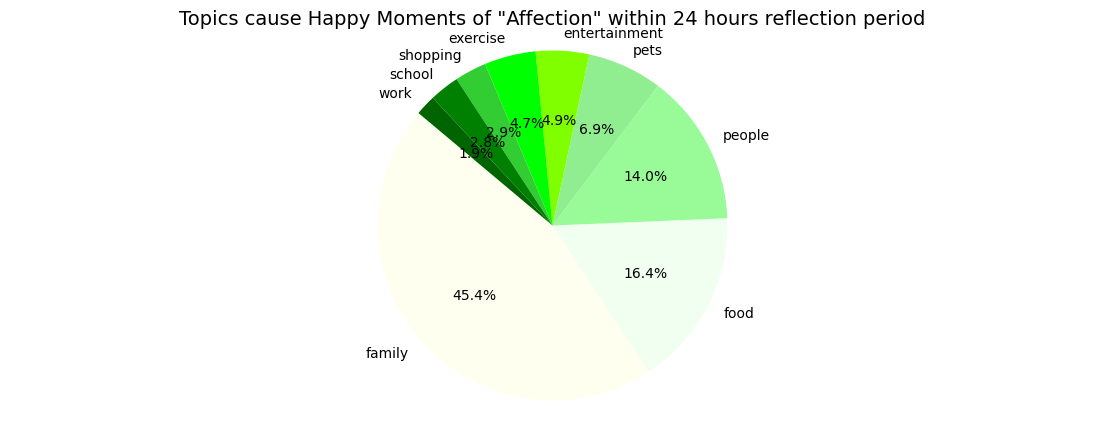

In [40]:
df_24h_t = df_topicT[(df_topicT['reflection_period']=='24h')&(df_topicT['predicted_category']=='affection')]
plt.figure(figsize=(14, 5))
label_counts_24h = df_24h_t["tokenLabel"].value_counts()
colors = ['ivory','honeydew','palegreen','lightgreen','chartreuse','lime','limegreen','green','darkgreen']

plt.pie(label_counts_24h, labels=label_counts_24h.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Topics cause Happy Moments of "Affection" within 24 hours reflection period', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

**In the topic of affection, people most commonly mention 'family', 'food', and 'people', and least mention 'work', 'school', and 'shopping'. An interesting discovery has been made: compared to long-term happy moments, people seem to derive less emotional satisfaction from 'work' and 'study' in the short term. In contrast, experiences with 'family' and friends or enjoying delicious 'food' can bring more happiness in the short term. This may be because work and study can bring stress, but being with family and friends and enjoying good food can alleviate stress.Hence, it is evident that to achieve a happy life, one needs to pursue long-term goals through work and study, but also pay attention to work-life balance and enjoy quality time with friends and family.**

**In summary, when not studying or working, go shopping with family and friends! This is something that brings happiness both in the short term and in the long term!**

# <font color='blue'> Section 3: Gender preferences in the pursuit of long-term and short_term happiness</font>

In [41]:
df_3m['gender'].value_counts()

m    29157
f    21060
o      348
Name: gender, dtype: int64

In [42]:
df_24h['gender'].value_counts()

m    28459
f    20913
o      346
Name: gender, dtype: int64

### - Draw pie charts according to gender distribution in each topic within 3 months under 'achievement' category

In [43]:
counts3 = df_3m_t.groupby('tokenLabel')['gender'].value_counts()  # or .size()
counts3 = pd.DataFrame(counts3)
counts3

gender
tokenLabel    gender        
entertainment m          693
              f          380
              o            7
exercise      m          904
              f          317
              o            5
family        f          381
              m          368
              o            7
food          m          946
              f          736
              o           16
people        m          970
              f          708
              o           13
pets          m           97
              f           75
school        m         1460
              f          950
              o           22
shopping      m         1558
              f          943
              o           21
work          m         2333
              f         1430
              o           15

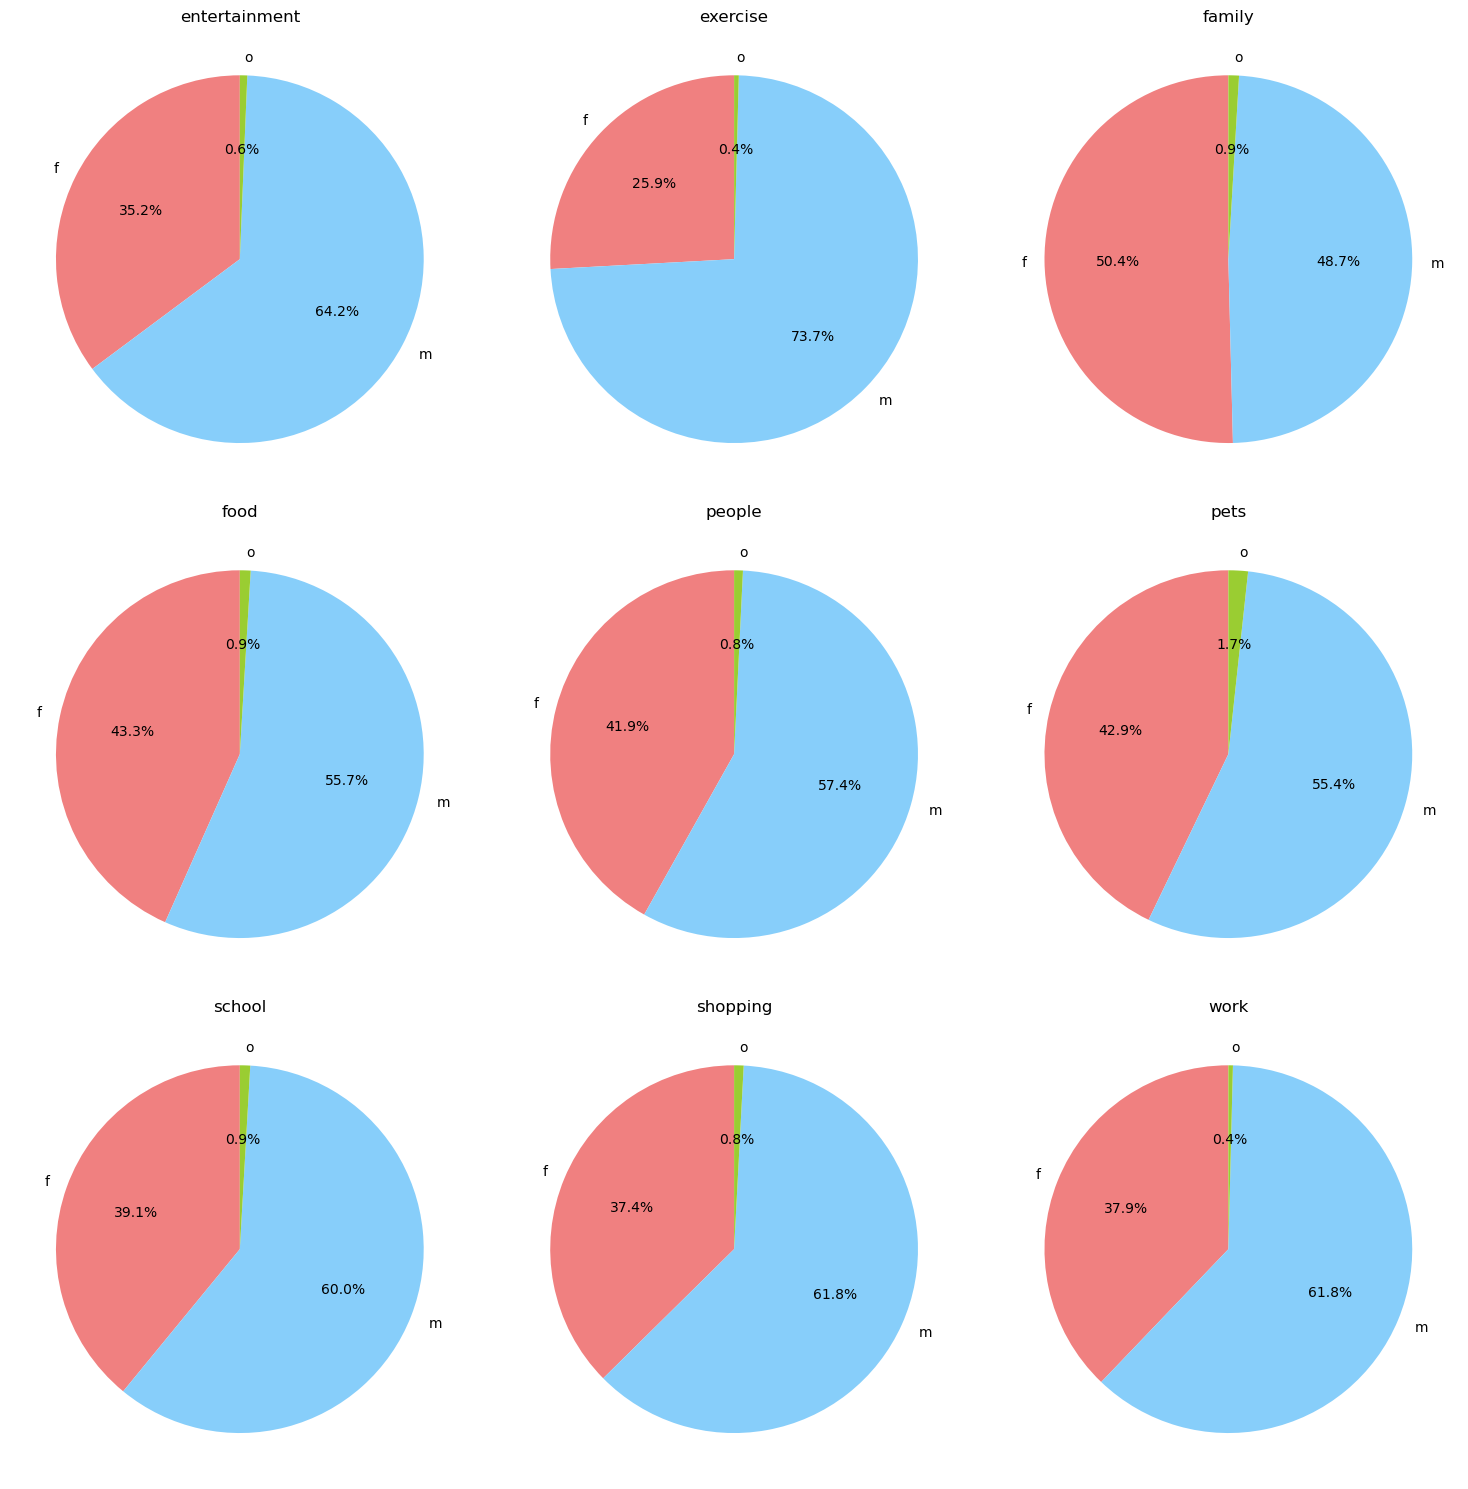

In [44]:
data = {
    'tokenLabel': ['entertainment', 'entertainment', 'entertainment',
                   'exercise', 'exercise', 'exercise',
                   'family', 'family', 'family',
                   'food', 'food', 'food',
                   'people', 'people', 'people',
                   'pets', 'pets', 'pets',
                   'school', 'school', 'school',
                   'shopping', 'shopping', 'shopping',
                   'work', 'work', 'work'],
    'gender': ['m', 'f', 'o',
               'm', 'f', 'o',
               'f', 'm', 'o',
               'm', 'f', 'o',
               'm', 'f', 'o',
               'm', 'f', 'o',
               'm', 'f', 'o',
               'm', 'f', 'o',
               'm', 'f', 'o'],
    'count': [693, 380, 7,
              904, 317, 5,
              381, 368, 7,
              946, 736, 16,
              970, 708, 13,
              97, 75, 3,
              1460, 950, 22,
              1558, 943, 21,
              2333, 1430, 15]
}

# Create a DataFrame
counts3 = pd.DataFrame(data)

# Pivot the data for pie chart plotting
counts3_pivot = counts3.pivot_table(index='tokenLabel', columns='gender', values='count', aggfunc='sum')

# Create a figure with subplots - one subplot for each tokenLabel
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) # Adjust the grid size based on your number of categories
axes_list = [item for sublist in axes for item in sublist] # Flatten the 2D list
colors = ['lightcoral', 'lightskyblue','yellowgreen']

for tokenLabel, data in counts3_pivot.iterrows():
    ax = axes_list.pop(0)
    data.plot(kind='pie', ax=ax, colors=colors, autopct='%1.1f%%', startangle=90, labels=['f', 'm', 'o'])
    ax.set_ylabel('')
    ax.set_title(tokenLabel)

# If there are any remaining empty subplots, remove them from the figure
for ax in axes_list:
    ax.remove()

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



**Certainly, looking back over the last 3 months in the 'achievement' category, under the topic of exercise, males are significantly more than females. 'Exercise' brings a greater sense of 'achievement' and happiness to men than it does to women. In terms of 'family', the performance of both genders is very balanced, suggesting that family can equally bring happiness to anyone! Overall, in the category of 'achievement', the proportion of males is higher than that of females.**

### - Draw pie charts according to gender distribution in each topic within 24 hours under 'affection' category

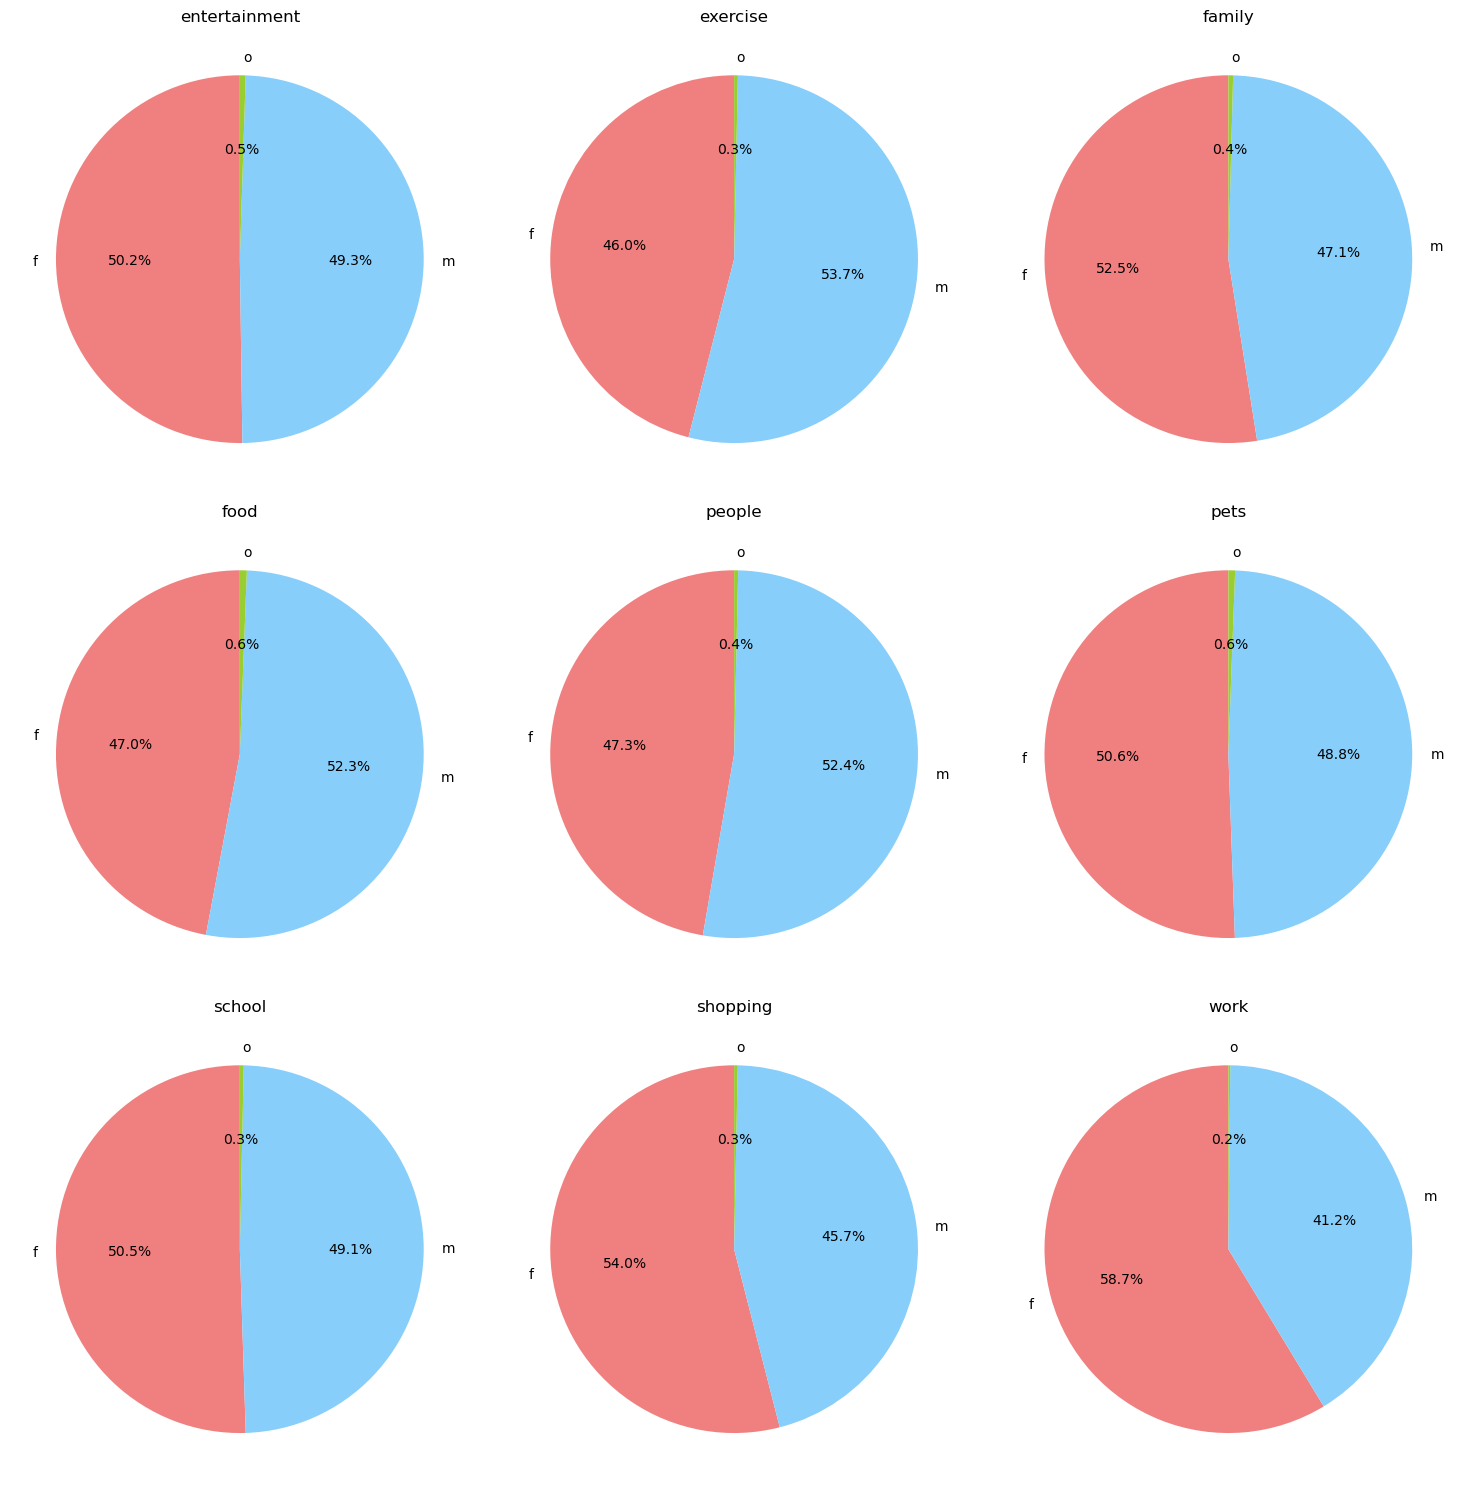

In [45]:
counts24 = df_24h_t.groupby('tokenLabel')['gender'].value_counts()  # or .size()
counts24 = pd.DataFrame(counts24)
# counts.index

df_unstacked24 = counts24.unstack(level='gender')
# df_unstacked
# Get the 'count' level for clean plotting (assuming 'count' is your column after unstacking)
df_unstacked24 = df_unstacked24['gender']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Choose colors
colors = ['lightcoral', 'lightskyblue','yellowgreen']

# Plot a pie chart for each 'tokenLabel'
for i, (tokenLabel, counts24) in enumerate(df_unstacked24.iterrows()):
    axes[i].pie(counts24, labels=counts24.index, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(tokenLabel)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


**It is observable that in the 24-hour retrospective of the affection category, overall, the proportion of genders in the affection category is relatively balanced. Under the topic of work, women slightly outnumber men, suggesting that the rewards of work seem to bring more happiness to women than they do to men.**

# <font color='blue'> Summary: Work-life balance is the key to a happy life!</font>

**It investigates what contributes to happiness, examining it from various angles, including short-term and long-term perspectives, and gender preferences.**

**The key findings are:**
- "Affection" and "Achievement" are the leading sources of reported happy moments, indicating the importance of interpersonal relationships and personal success.
- The word cloud analysis reveals that friends and work are the top contributors to happiness, with shopping, playing, and dining also being significant factors.
- The importance of 'affection' and 'achievement' varies over time. Over 3 months, 'achievement' is more significant, whereas 'affection' is more impactful over the past 24 hours.
- In the achievement category, work, shopping, and school are key, while in affection, family, food, and people are most mentioned.
- Males engage more in exercise for achievement within 3 months, while work brings more happiness to women than men within 24 hours.

**The key to a happy life is a balanced approach to happiness, advocating for a mix of work, study, and leisure activities like shopping and spending time with family and friends.**